Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-07 13:21:59.028175: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,575 (12.61 MB)

 Trainable params: 3,306,575 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

# Set main data directory and parameters
DATA_DIR = '/workspaces/Plant-Disease-CNN/data/PlantVillage'  
IMG_SIZE = (128, 128)           # Image size for resizing
BATCH_SIZE = 32                 # Number of images per batch
SEED = 42                       # For reproducibility

2025-12-07 13:30:29.899044: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-07 13:30:29.954216: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-07 13:30:31.848915: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Sample classes: ['Tomato_Septoria_leaf_spot', 'Potato___healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Tomato__Tomato_mosaic_virus']


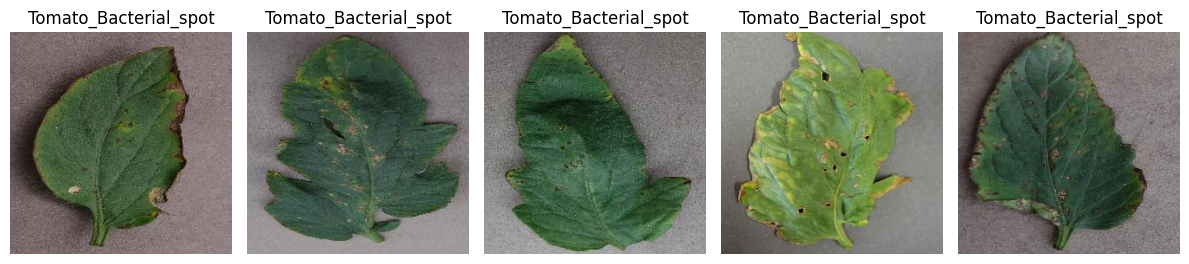

In [2]:
import random
from PIL import Image

classes = os.listdir(DATA_DIR)
print("Sample classes:", classes[:5])

# Visualize some images from random classes
sample_class = random.choice(classes)
sample_img_paths = os.listdir(os.path.join(DATA_DIR, sample_class))[:5]

plt.figure(figsize=(12,3))
for i, img_name in enumerate(sample_img_paths):
    img_path = os.path.join(DATA_DIR, sample_class, img_name)
    img = Image.open(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(sample_class)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
augmented_train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_train_generator = augmented_train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=SEED
)

Found 16516 images belonging to 15 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/workspaces/Plant-Disease-CNN/data/PlantVillage_test', 
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 2591 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_DIR = '../data/PlantVillage'  # Adjust as needed
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
# Number of classes (output categories)
num_classes = train_generator.num_classes  # or use len(train_generator.class_indices)

# Build a simple CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print a summary
model.summary()

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-07 13:33:13.485170: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,575 (12.61 MB)

 Trainable params: 3,306,575 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
EPOCHS = 10  # You can increase to 20+ for better results

history = model.fit(
    augmented_train_generator,     
    steps_per_epoch=augmented_train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE
)

Epoch 1/10


2025-12-07 13:33:22.951755: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 65028096 exceeds 10% of free system memory.


  1/516 ━━━━━━━━━━━━━━━━━━━━ 25:32 3s/step - accuracy: 0.1250 - loss: 2.7025

2025-12-07 13:33:23.678318: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 65028096 exceeds 10% of free system memory.
2025-12-07 13:33:23.851364: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 65028096 exceeds 10% of free system memory.


  2/516 ━━━━━━━━━━━━━━━━━━━━ 5:53 688ms/step - accuracy: 0.1172 - loss: 2.7233

2025-12-07 13:33:24.408478: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 65028096 exceeds 10% of free system memory.
2025-12-07 13:33:24.539329: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 65028096 exceeds 10% of free system memory.


516/516 ━━━━━━━━━━━━━━━━━━━━ 340s 654ms/step - accuracy: 0.4070 - loss: 1.8674 - val_accuracy: 0.4958 - val_loss: 1.7013
Epoch 2/10
  1/516 ━━━━━━━━━━━━━━━━━━━━ 4:24 513ms/step - accuracy: 0.4688 - loss: 1.4467

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.4688 - loss: 1.4467 - val_accuracy: 0.5862 - val_loss: 1.2829
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 358s 651ms/step - accuracy: 0.5789 - loss: 1.3013 - val_accuracy: 0.6255 - val_loss: 1.1085
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.5938 - loss: 1.0321 - val_accuracy: 0.5806 - val_loss: 1.3320
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 361s 653ms/step - accuracy: 0.6424 - loss: 1.0812 - val_accuracy: 0.6975 - val_loss: 0.8516
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.8438 - loss: 0.7296 - val_accuracy: 0.6960 - val_loss: 0.8383
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 382s 741ms/step - accuracy: 0.6851 - loss: 0.9310 - val_accuracy: 0.7100 - val_loss: 0.8176
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.6562 - loss: 0.8555 - val_accuracy: 0.7256 - val_loss: 0.7757
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 382s 740ms/step - accuracy: 0.7211 - loss: 0.8301 - val

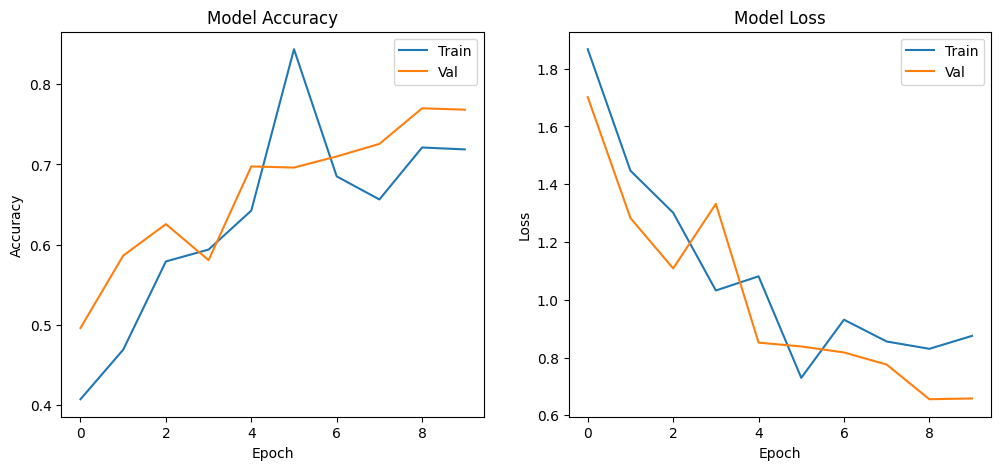

In [8]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('src/plant_disease_cnn.keras')
model.save('src/plant_disease_cnn.h5')

In [11]:
loss, accuracy = model.evaluate(val_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - accuracy: 0.7678 - loss: 0.6605
Validation Loss: 0.6604843139648438
Validation Accuracy: 0.7678311467170715


129/129 ━━━━━━━━━━━━━━━━━━━━ 24s 184ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.05      0.07      0.06       199
                     Pepper__bell___healthy       0.09      0.13      0.11       295
                      Potato___Early_blight       0.03      0.06      0.04       200
                       Potato___Late_blight       0.01      0.01      0.01       200
                           Potato___healthy       0.00      0.00      0.00        30
                      Tomato_Bacterial_spot       0.12      0.09      0.10       425
                        Tomato_Early_blight       0.06      0.06      0.06       200
                         Tomato_Late_blight       0.07      0.06      0.06       381
                           Tomato_Leaf_Mold       0.09      0.04      0.05       190
                  Tomato_Septoria_leaf_spot       0.08      0.10      0.09       354
Tomato_Spider_mites_

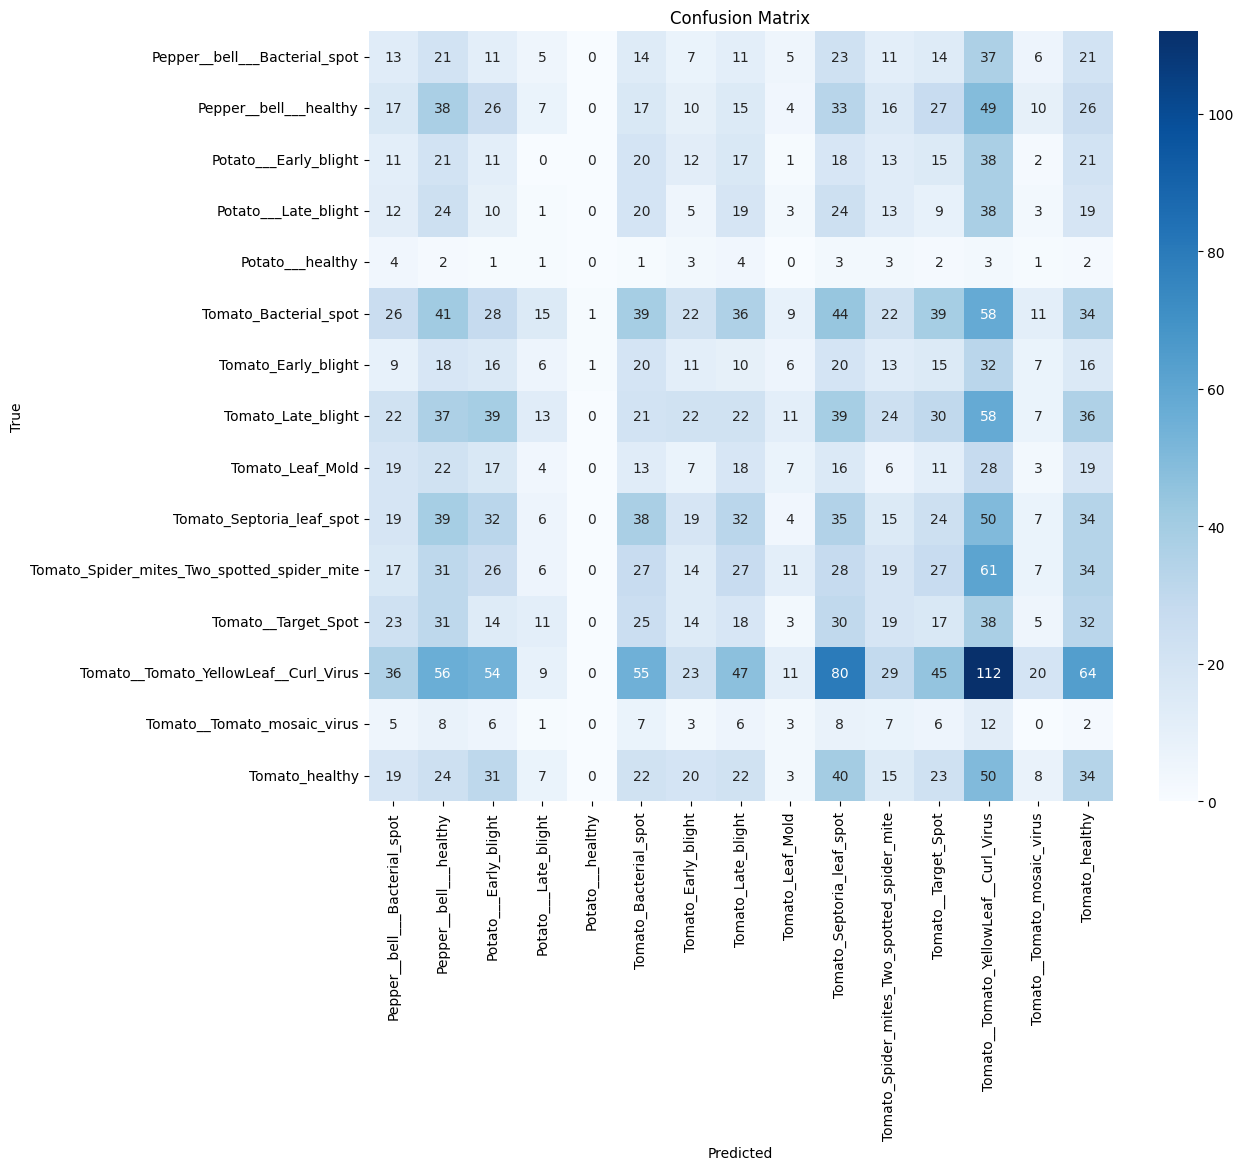

In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict labels for the validation set
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_disease(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Model expects batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions)

    print(f"Predicted class: {predicted_class} (Confidence: {confidence:.2f})")

# Example usage:
img_path = '/workspaces/Plant-Disease-CNN/data/PlantVillage_test/Potato___Late_blight/00b1f292-23dd-44d4-aad3-c1ffb6a6ad5a___RS_LB 4479.JPG'
predict_disease(img_path, model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: Tomato_Spider_mites_Two_spotted_spider_mite (Confidence: 0.61)


In [16]:
print(class_labels)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
